IL Top 10 - david 

In [13]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
pd.set_option('display.max_columns',None)
import seaborn as sns
from shapely.geometry import Point, Polygon

In [14]:
stores_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_2022.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH']
stores_2022 = stores_2022.drop(stores_2022[stores_2022['STATE'].isin(territories)].index)
stores_2022.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [19]:
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.tail(20)

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
203480,CARDENAS MARKET,1645 W HOLT AVE,POMONA,CA,91768,3341.0,37.0,909,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,549927.0,MEXICAN & LATIN AMERICAN FOOD PRODUCTS,599934.0,MEXICAN GOODS,546102.0,BAKERS-RETAIL,581248.0,JUICE BARS,NaN,NaN,2022,39106.0,67.0,17680.0,2,NaN,NaN,NaN,NaN,503898215,614447001.0,8730657.0,25.0,9692568.0,D,K,NaN,NaN,7,402406.0,1.0,34.062494,-117.778292,P,31080.0,2.0,348.0,6037.0
203481,CIRCLE K,1407 ELTON RD,JENNINGS,LA,70546,3609.0,53.0,337,2,B,B,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,754201.0,CAR WASHING & POLISHING,598405.0,GAS-PROPANE-REFILLING STATIONS,554101.0,SERVICE STATIONS-GASOLINE & OIL,2022,NaN,6.0,680.0,2,F,NaN,NaN,NaN,702630724,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,6,500.0,1.0,30.236198,-92.663742,P,27660.0,1.0,324.0,22053.0
203482,ALDI,1201 GEORGE TOWNE DR,PEWAUKEE,WI,53072,2731.0,133.0,262,2,C,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,10.0,2018.0,2,A,NaN,NaN,NaN,426612410,NaN,200026573.0,150.0,1200000.0,F,K,NaN,NaN,7,203304.0,1.0,43.084436,-88.240155,P,33340.0,2.0,376.0,55133.0
203483,CASEL'S MARKETPLACE,8008 VENTNOR AVE,MARGATE CITY,NJ,8402,2741.0,1.0,609,2,D,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,581212.0,CATERERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,49.0,12957.0,2,L,1958.0,NaN,NaN,112337100,248856791.0,885216069.0,100.0,39305256.0,F,K,NaN,NaN,5,13000.0,4.0,39.329527,-74.499090,P,12100.0,2.0,428.0,34001.0
203484,PAWNEE CITY THRIFTWAY,535 F ST,PAWNEE CITY,NE,68420,3074.0,133.0,402,2,C,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,593222.0,THRIFT SHOPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,12.0,1638.0,9,NaN,2017.0,NaN,NaN,308420538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,967800.0,3.0,40.107899,-96.154770,P,0.0,NaN,0.0,31133.0
203485,CASEY'S,13941 HIGHWAY 6,WAVERLY,NE,68462,1228.0,109.0,402,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,592102.0,LIQUORS-RETAIL,554101.0,SERVICE STATIONS-GASOLINE & OIL,581222.0,PIZZA,592102.0,LIQUORS-RETAIL,NaN,NaN,2022,NaN,7.0,1745.0,2,9,NaN,NaN,NaN,826453862,398553685.0,441412723.0,400.0,12952594.0,G,H,NaN,NaN,4,10100.0,3.0,40.914453,-96.531382,P,30700.0,2.0,339.0,31109.0
203487,SPEEDEE MART,1202 S 13TH ST,OMAHA,NE,68108,3502.0,55.0,402,2,C,B,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,539901.0,GENERAL MERCHANDISE-RETAIL,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,581222.0,PIZZA,541105.0,GROCERS-RETAIL,2022,21303.0,15.0,603.0,2,NaN,2021.0,NaN,NaN,758437903,NaN,436759340.0,NaN,NaN,NaN,NaN,NaN,NaN,6,2100.0,1.0,41.247795,-95.933830,P,36540.0,2.0,420.0,31055.0
203488,KUM & GO,1180 CAPITOL AVE,OMAHA,NE,68102,1113.0,55.0,402,2,NaN,NaN,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,581206.0,FOODS-CARRY OUT,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,0.0,2,K,NaN,NaN,NaN,760051183,523957975.0,843266719.0,150

In [8]:
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)


other_row = grocery_t10_22.iloc[10:]
other_column = other_row['COUNT'].sum()


grocery_t10_22 = grocery_t10_22.iloc[:10]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22

,PARENT NUMBER,COUNT,Percent
1067,nan,77818,49.287773
78,5863311.0,11939,7.561833
585,450720289.0,6814,4.315799
81,5889993.0,4397,2.784938
92,7521503.0,3574,2.263673
574,441412723.0,2499,1.582798
84,5995907.0,2493,1.578997
263,200026573.0,2217,1.404187
281,238136725.0,2105,1.333249
843,714232249.0,1760,1.114735


In [12]:
gil=grocery_sic.query("STATE == 'IL'")
gil

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
13,KROGER,301 E MCKINLEY RD,OTTAWA,IL,61350,4805.0,99.0,815,2,E,...,7,963500.0,1.0,41.323858,-88.836271,P,36837.0,1.0,176.0,17099.0
86,CIRCLE K,290 MAIN ST,MARSEILLES,IL,61341,NaN,99.0,815,2,C,...,5,962400.0,2.0,41.333000,-88.701000,X,36837.0,1.0,176.0,17099.0
199,SPRING VALLEY SUPERMARKET,117 S SPALDING ST,SPRING VALLEY,IL,61362,2097.0,11.0,815,2,E,...,5,965200.0,2.0,41.323951,-89.199282,P,36837.0,1.0,176.0,17011.0
238,FREEDOM OIL CO,402 N MAIN ST,TOLUCA,IL,61369,9025.0,123.0,815,2,B,...,3,961500.0,2.0,41.005092,-89.133807,P,37900.0,2.0,0.0,17123.0
316,SENECA FOOD MART,271 S MAIN ST,SENECA,IL,61360,9415.0,99.0,815,2,B,...,4,963700.0,1.0,41.306622,-88.610207,P,36837.0,1.0,176.0,17099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203321,AL A CARTE FOOD,2620 W CERMAK RD,CHICAGO,IL,60608,6171.0,31.0,773,2,A,...,8,840700.0,3.0,41.852085,-87.691277,4,16980.0,2.0,176.0,17031.0
203333,LAKEVIEW FOODS INC,4106 N SHERIDAN RD,CHICAGO,IL,60613,2007.0,31.0,773,2,B,...,7,32100.0,3.0,41.956971,-87.654794,P,16980.0,2.0,176.0,17031.0
203352,THORNDALE MART INC,1104 W THORNDALE AVE,CHICAGO,IL,60660,3516.0,31.0,773,2,A,...,7,30101.0,1.0,41.990189,-87.658514,P,16980.0,2.0,176.0,17031.0
203353,SMITH & SMITH,S CHICAGO,CHICAGO,IL,60641,NaN,31.0,773,2,A,...,8,831700.0,1.0,41.948300,-87.743900,X,16980.0,2.0,176.0,17031.0


In [56]:
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20)

,PARENT NUMBER,COUNT,Percent
0,nan,77818,49.287773
1,5863311.0,11939,7.561833
2,450720289.0,6814,4.315799
3,5889993.0,4397,2.784938
4,7521503.0,3574,2.263673
5,441412723.0,2499,1.582798
6,5995907.0,2493,1.578997
7,200026573.0,2217,1.404187
8,238136725.0,2105,1.333249
9,714232249.0,1760,1.114735


In [54]:

il = grocery_sic.loc[grocery_sic["STATE"] == 'IL']
il


,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
13,KROGER,301 E MCKINLEY RD,OTTAWA,IL,61350,4805.0,99.0,815,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,70.0,14158.0,2,P,NaN,NaN,NaN,152123287,NaN,7521503.0,1200.0,137888000.0,I,I,152123287.0,NaN,7,963500.0,1.0,41.323858,-88.836271,P,36837.0,1.0,176.0,17099.0
86,CIRCLE K,290 MAIN ST,MARSEILLES,IL,61341,NaN,99.0,815,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,11.0,2225.0,2,F,NaN,NaN,NaN,312709629,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,5,962400.0,2.0,41.333000,-88.701000,X,36837.0,1.0,176.0,17099.0
199,SPRING VALLEY SUPERMARKET,117 S SPALDING ST,SPRING VALLEY,IL,61362,2097.0,11.0,815,2,E,E,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,542107.0,MEAT-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,60.0,8908.0,9,NaN,NaN,NaN,NaN,2994101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,965200.0,2.0,41.323951,-89.199282,P,36837.0,1.0,176.0,17011.0
238,FREEDOM OIL CO,402 N MAIN ST,TOLUCA,IL,61369,9025.0,123.0,815,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,7.0,1545.0,2,NaN,NaN,NaN,NaN,308353358,NaN,452637325.0,17.0,52200.0,C,H,NaN,NaN,3,961500.0,2.0,41.005092,-89.133807,P,37900.0,2.0,0.0,17123.0
316,SENECA FOOD MART,271 S MAIN ST,SENECA,IL,61360,9415.0,99.0,815,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,209903.0,FOOD PRODUCTS & MANUFACTURERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,8.0,1618.0,2,NaN,NaN,NaN,NaN,152142808,NaN,558247.0,75.0,1385280.0,E,K,NaN,NaN,4,963700.0,1.0,41.306622,-88.610207,P,36837.0,1.0,176.0,17099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203321,AL A CARTE FOOD,2620 W CERMAK RD,CHICAGO,IL,60608,6171.0,31.0,773,2,A,B,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,2.0,512.0,9,NaN,NaN,NaN,NaN,404191958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,840700.0,3.0,41.852085,-87.691277,4,16980.0,2.0,176.0,17031.0
203333,LAKEVIEW FOODS INC,4106 N SHERIDAN RD,CHICAGO,IL,60613,2007.0,31.0,773,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1278.0,9,NaN,NaN,NaN,NaN,151164688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,32100.0,3.0,41.956971,-87.654794,P,16980.0,2.0,176.0,17031.0
203352,THORNDALE MART INC,1104 W THORNDALE AVE,CHICAGO,IL,60660,3516.0,31.0,773,2,A,A,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,1.0,256.0,9,NaN,NaN,NaN,NaN,427743704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,30101.0,1.0,41.990189,-87.658514,P,16980.0,2.0,176.0,17031.0
203353,SMITH & SMITH,S CHICAGO,CHICAGO,IL,60641,NaN,31.0,773,2,A,B,541

In [60]:


groc_tp10_il = il.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
groc_tp10_il.sort_values('COUNT', ascending=False, inplace=True)
groc_tp10_il.reset_index(drop=True,inplace=True)

groc_tp10_il = groc_tp10_il.iloc[:11]
groc_tp10_il.loc[len(groc_tp10_il)] = ["Other", other_column]
groc_tp10_il['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
groc_tp10_il['Percent'] = groc_tp10_il['COUNT'] / len(il) * 100
groc_tp10_il.tail(20)

,PARENT NUMBER,COUNT,Percent
0,nan,2236,43.074552
1,5863311.0,525,10.113658
2,450720289.0,446,8.591793
3,5889993.0,329,6.337893
4,7521503.0,221,4.257369
5,441412723.0,189,3.640917
6,5995907.0,134,2.581391
7,200026573.0,122,2.350222
8,238136725.0,89,1.714506
9,714232249.0,68,1.309960


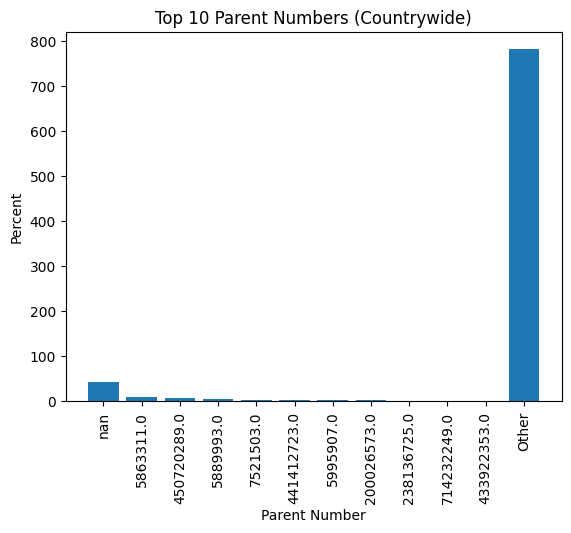

In [61]:
#top 10 parent ( Illinois) 

plt.bar(groc_tp10_il['PARENT NUMBER'], groc_tp10_il['Percent'])
plt.xlabel('Parent Number')
plt.ylabel('Percent')
plt.title('Top 10 Parent Numbers (Countrywide)')
plt.xticks(rotation=90)
plt.show()

In [51]:

IL_SIC1 = grocery_sic[(grocery_sic['PARENT NUMBER']== 5863311.0) & (grocery_sic['STATE'] == 'IL')]
IL_SIC1
IL_SIC2 = grocery_sic[(grocery_sic['PARENT NUMBER']== 450720289.0) & (grocery_sic['STATE'] == 'IL')]
IL_SIC2



,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
86,CIRCLE K,290 MAIN ST,MARSEILLES,IL,61341,NaN,99.0,815,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,11.0,2225.0,2,F,NaN,NaN,NaN,312709629,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,5,962400.0,2.0,41.333000,-88.701000,X,36837.0,1.0,176.0,17099.0
590,CIRCLE K,1727 N BLOOMINGTON ST,STREATOR,IL,61364,1315.0,99.0,815,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,11.0,2023.0,2,F,NaN,NaN,NaN,211116660,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,7,963800.0,1.0,41.141578,-88.835061,P,36837.0,1.0,176.0,17099.0
897,CIRCLE K,920 E MAIN ST,STREATOR,IL,61364,3137.0,99.0,815,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,8.0,1618.0,2,F,NaN,NaN,NaN,404988142,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,7,964300.0,1.0,41.121354,-88.822279,P,36837.0,1.0,176.0,17099.0
946,CIRCLE K,1500 COLUMBUS ST,OTTAWA,IL,61350,2010.0,99.0,815,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,2022,NaN,8.0,1618.0,2,F,NaN,NaN,NaN,669454357,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,7,962600.0,3.0,41.355416,-88.840637,P,36837.0,1.0,176.0,17099.0
1381,CIRCLE K,1006 W MAIN ST,STREATOR,IL,61364,2663.0,99.0,815,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,9.0,1821.0,2,F,NaN,NaN,NaN,152151734,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,7,963900.0,5.0,41.121161,-88.848118,P,36837.0,1.0,176.0,17099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198991,CIRCLE K,12230 S CICERO AVE,ALSIP,IL,60803,2907.0,31.0,708,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,8.0,2045.0,2,F,NaN,NaN,NaN,742818716,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,7,823200.0,2.0,41.670260,-87.739466,P,16980.0,2.0,176.0,17031.0
201206,CIRCLE K,2635 W 87TH ST,EVERGREEN PARK,IL,60805,1102.0,31.0,708,2,C,D,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,10.0,2556.0,2,F,NaN,NaN,NaN,401822766,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,6,700502.0,1.0,41.735730,-87.689054,P,16980.0,2.0,176.0,17031.0
202206,CIRCLE K,5500 S PULASKI RD,CHICAGO,IL,60629,4418.0,31.0,773,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,8.0,2045.0,2,F,NaN,NaN,NaN,705232234,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,8,620300.0,1.0,41.793083,-87.723547,P,16980.0,2.0,176.0,17031.0
20229

In [48]:
IL_SIC3 = grocery_sic[(grocery_sic['PARENT NUMBER']== 5889993.0) & (grocery_sic['STATE'] == 'IL')]
IL_SIC3

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
1644,WALMART GROCERY PICKUP,4041 VETERANS DR,OTTAWA,IL,61350,9602.0,99.0,815,2,A,B,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,3.0,607.0,2,H,NaN,NaN,NaN,735781044,632353488.0,5889993.0,11000.0,572754000.0,K,K,152128948.0,NaN,7,962200.0,2.0,41.378018,-88.843800,P,36837.0,1.0,176.0,17099.0
1812,WALMART GROCERY PICKUP,2111 CLAUDE BAILEY PKWY,PRINCETON,IL,61356,8618.0,11.0,815,2,A,B,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,3.0,604.0,2,H,NaN,NaN,NaN,742114996,632353488.0,5889993.0,11000.0,572754000.0,K,K,566692307.0,NaN,6,965300.0,1.0,41.396641,-89.463394,P,36837.0,1.0,176.0,17011.0
2872,WALMART GROCERY PICKUP,5307 STATE ROUTE 251,PERU,IL,61354,9313.0,99.0,815,2,A,B,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,3.0,607.0,2,H,2018.0,NaN,NaN,735596259,632353488.0,5889993.0,11000.0,572754000.0,K,K,872729181.0,NaN,6,962100.0,2.0,41.372650,-89.124565,P,36837.0,1.0,176.0,17099.0
3666,WALMART GROCERY PKUP-DELIVERY,155 E COURTLAND ST,MORTON,IL,61550,8931.0,179.0,309,2,D,E,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,541105.0,GROCERS-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,25.0,5162.0,2,H,2017.0,NaN,NaN,728555710,632353488.0,5889993.0,11000.0,572754000.0,K,K,691532592.0,NaN,6,21603.0,2.0,40.630159,-89.461855,P,37900.0,2.0,0.0,17179.0
3779,WALMART GROCERY PKUP-DELIVERY,3320 VETERANS DR,PEKIN,IL,61554,9319.0,179.0,309,2,A,A,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,541105.0,GROCERS-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,2.0,413.0,2,H,2018.0,NaN,NaN,738722548,632353488.0,5889993.0,11000.0,572754000.0,K,K,402779235.0,NaN,7,21702.0,2.0,40.537993,-89.594981,P,37900.0,2.0,0.0,17179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198769,WALMART NEIGHBORHOOD MARKET,4720 S COTTAGE GROVE AVE,CHICAGO,IL,60615,1612.0,31.0,773,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,70.0,17889.0,2,ï¿½,NaN,NaN,NaN,706714093,632353488.0,5889993.0,11000.0,572754000.0,K,K,706714093.0,NaN,7,843600.0,1.0,41.808829,-87.606970,P,16980.0,2.0,176.0,17031.0
199773,WALMART GROCERY PKUP-DELIVERY,3320 S CICERO AVE,CICERO,IL,60804,4531.0,31.0,708,2,C,C,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,14.0,2300.0,2,H,NaN,NaN,NaN,737762886,632353488.0,5889993.0,11000.0,572754000.0,K,K,705118889.0,NaN,8,814200.0,2.0,41.831024,-87.747063,P,16980.0,2.0,176.0,17031.0
200583,WALMART GROCERY PICKUP,4720 S COTTAGE GROVE AVE,CHICAGO,IL,60615,1612.0,31.0,773,2,C,C,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,14.0,2300.0,2,H,NaN,NaN,NaN,753862172,632353488.0,5889993.0,11000.0,572754000.0,K,K,706714093.0,NaN,7,843600.0,1.0,41.808829,-87.606970,P,16980.0,2.0,176.0,17031.0
202622,WALMART NEIGHBORHOOD MARKET,7535 S ASHLAND AVE,CHICAGO,IL,60620,4246.0,31.0,773,2,

In [ ]:
plt.bar(x, y)
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Sales by Store')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show(